In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv(r"D:\Study\Testing dataset\CSV data\news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [22]:
df = df.iloc[:, 2:]

In [23]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [24]:
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [25]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [26]:
df['vector'] = df['text'].apply(lambda x: nlp(x).vector)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df['vector'].values, df['label'], test_size=0.2, random_state=0)

In [28]:
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [29]:
x_train_2d

array([[-0.0459621 ,  0.16113867, -0.04039187, ..., -0.02624796,
        -0.03438063,  0.03919547],
       [-0.02329614,  0.1664339 , -0.03787674, ..., -0.05774156,
        -0.03282457,  0.02450689],
       [-0.03879104,  0.14745133, -0.15994431, ..., -0.05703992,
         0.00901073,  0.0382135 ],
       ...,
       [-0.01043465,  0.14567089, -0.11832596, ..., -0.02929449,
        -0.03479956,  0.06340745],
       [ 0.00065027,  0.13776287, -0.02057046, ..., -0.07257748,
        -0.09462489,  0.02773136],
       [-0.04162662,  0.1696045 , -0.04615257, ..., -0.06562798,
        -0.00358895,  0.00064403]], dtype=float32)

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [120]:
scaler = MinMaxScaler()
model = MultinomialNB()
scale_train = scaler.fit_transform(x_train_2d)
scale_test = scaler.transform(x_test_2d)
model.fit(scale_train, y_train)

MultinomialNB()

In [121]:
predict_mnb = model.predict(scale_test)

In [122]:
print(classification_report(y_test, predict_mnb))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       615
           1       0.78      0.73      0.76       652

    accuracy                           0.76      1267
   macro avg       0.76      0.76      0.76      1267
weighted avg       0.76      0.76      0.76      1267



In [113]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(scale_train, y_train)
predict_knn = model.predict(scale_test)

In [114]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       615
           1       0.77      0.94      0.84       652

    accuracy                           0.82      1267
   macro avg       0.84      0.82      0.82      1267
weighted avg       0.84      0.82      0.82      1267



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from sklearn.pipeline import Pipeline

# Define the pipeline and parameter grid

# RandomForestClassifier
rf_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier(random_state=0))
])

rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# GradientBoostingClassifier
gb_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('gb', GradientBoostingClassifier(random_state=0))
])

gb_param_grid = {
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 5, 10],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for RandomForestClassifier
rf_grid_search = RandomizedSearchCV(
    estimator=rf_pipeline, param_distributions=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(x_train_2d, y_train)

# Perform GridSearchCV for GradientBoostingClassifier
gb_grid_search = RandomizedSearchCV(
    estimator=gb_pipeline, param_distributions=gb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(x_train_2d, y_train)

# Print the best parameters and scores
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boosting Best Score:", gb_grid_search.best_score_)

Random Forest Best Parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_depth': 10}
Random Forest Best Score: 0.8749010595301071
Gradient Boosting Best Parameters: {'gb__n_estimators': 200, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 1, 'gb__max_depth': 5, 'gb__learning_rate': 0.2}
Gradient Boosting Best Score: 0.9019327987219775


C:\Users\Shanta\AppData\Local\Temp\ipykernel_22300\2180781699.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_counts,


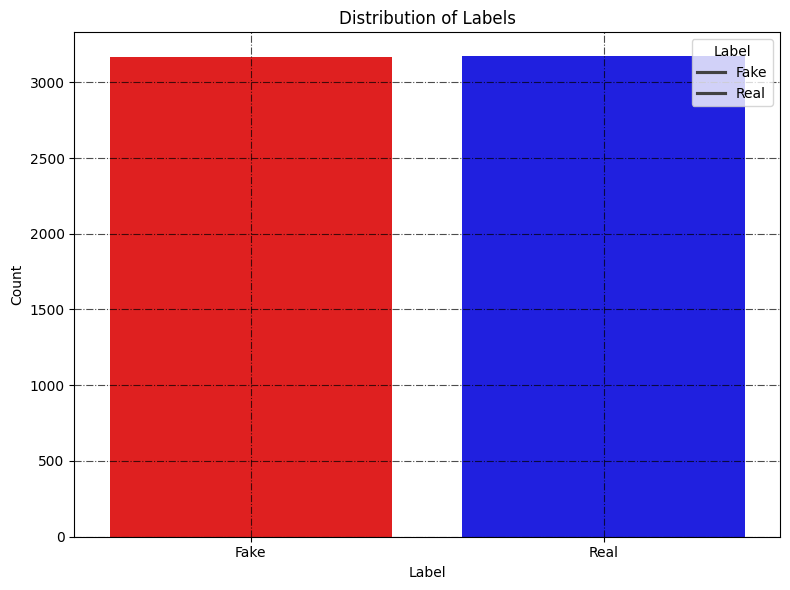

In [ ]:
# Convert value counts to a DataFrame for plotting
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Plot the barplot
plt.figure(figsize=(8, 6), dpi=100)
sns.barplot(x='label', y='count', data=label_counts,
            width=0.8, palette=['red', 'blue'])
plt.legend(title='Label', labels=['Fake', 'Real'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])
plt.grid(linestyle='-.', alpha=0.7, color='black')
plt.tight_layout()
plt.show()

C:\Users\Shanta\AppData\Local\Temp\ipykernel_22300\464900403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Gradient Boosting', 'Random Forest'], y=[
C:\Users\Shanta\AppData\Local\Temp\ipykernel_22300\464900403.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=['Gradient Boosting', 'Random Forest'], y=[


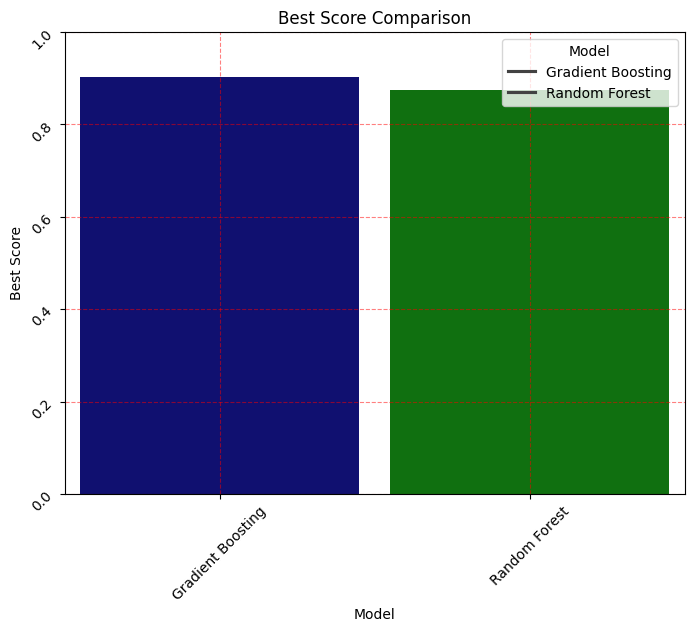

In [86]:
plt.figure(figsize=(8, 6), dpi=100)
sns.barplot(x=['Gradient Boosting', 'Random Forest'], y=[
            gb_grid_search.best_score_, rf_grid_search.best_score_], width=0.9, palette=['navy', 'green', 0.6])
plt.legend(title='Model', labels=['Gradient Boosting', 'Random Forest'])
plt.grid(linestyle='--', alpha=0.5, color='red')
plt.title('Best Score Comparison')
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.ylim(0, 1)  # Optional: Set y-axis limits if scores are between 0 and 1
plt.show()

C:\Users\Shanta\AppData\Local\Temp\ipykernel_22300\2781808147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= ['Gradient Boosting', 'Random Forest', 'KNN', 'MultinomialNB'], y=[0.90, 0.87, 0.82, 0.76],


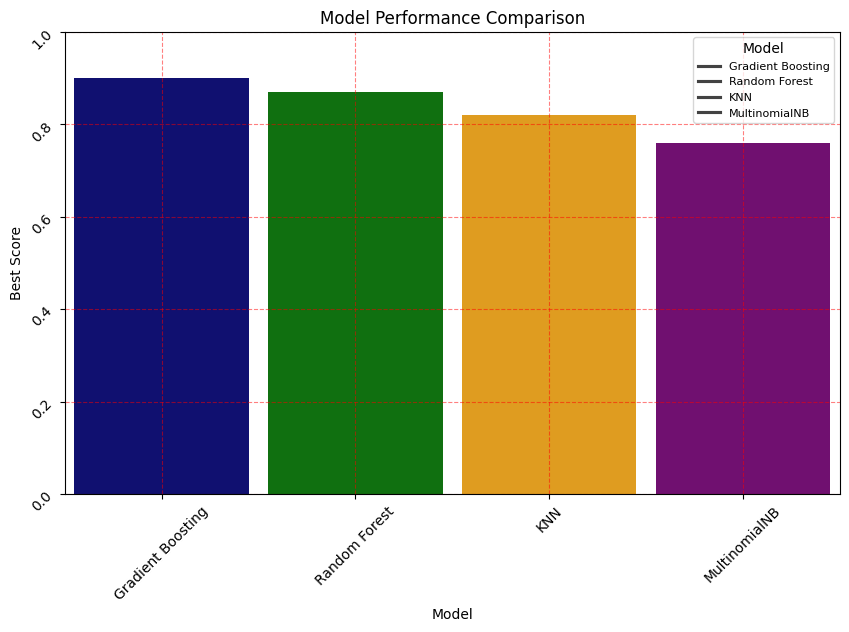

In [142]:
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x= ['Gradient Boosting', 'Random Forest', 'KNN', 'MultinomialNB'], y=[0.90, 0.87, 0.82, 0.76], 
            palette=['navy', 'green', 'orange', 'purple'], width=0.9)

plt.legend(title='Model', labels=['Gradient Boosting', 'Random Forest', 'KNN', 'MultinomialNB'], 
           loc='best', fontsize=8) 
plt.grid(linestyle='--', alpha=0.5, color='red')
plt.title('Model Performance Comparison')
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.ylim(0, 1)  # Optional: Set y-axis limits if scores are between 0 and 1
plt.show()

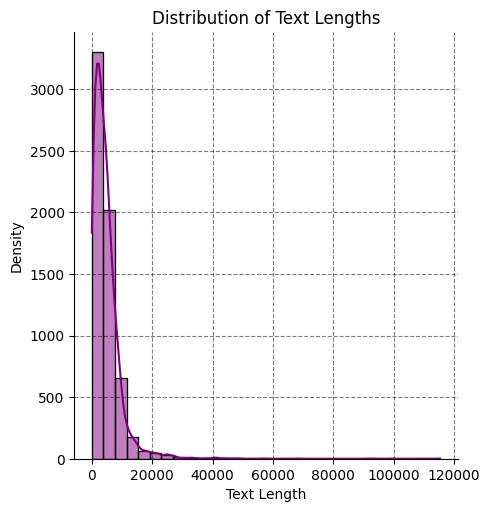

In [ ]:
sns.displot(df['text'].str.len(), kde=True, bins=30, color='purple')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.grid(linestyle='--', alpha=0.5, color='black')
plt.show()

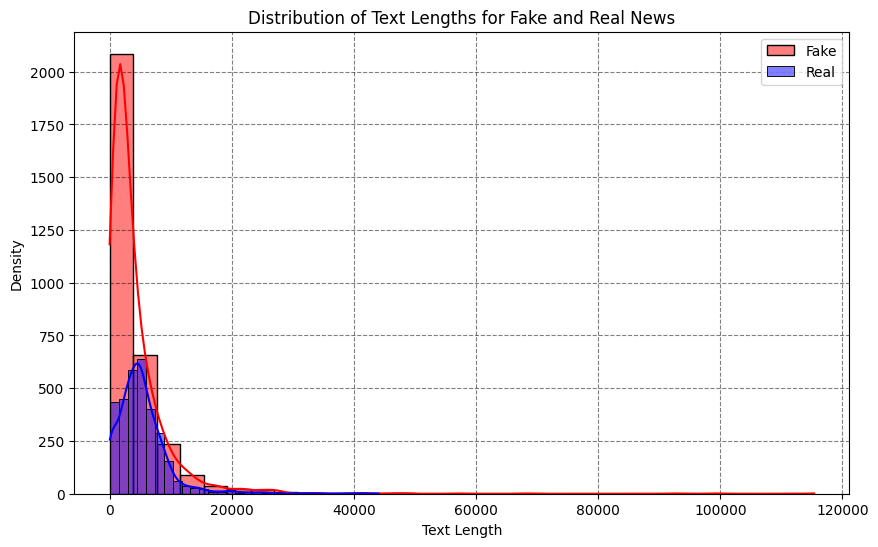

In [ ]:
# Plotting the distribution of text lengths for fake and real news
plt.figure(figsize=(10, 6), dpi=100)
sns.histplot(df[df['label'] == 0]['text'].str.len(), bins=30,
             kde=True, color='red', label='Fake', alpha=0.5)
sns.histplot(df[df['label'] == 1]['text'].str.len(), bins=30,
             kde=True, color='blue', label='Real', alpha=0.5)
plt.title('Distribution of Text Lengths for Fake and Real News')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.grid(linestyle='--', alpha=0.5, color='black')
plt.show()

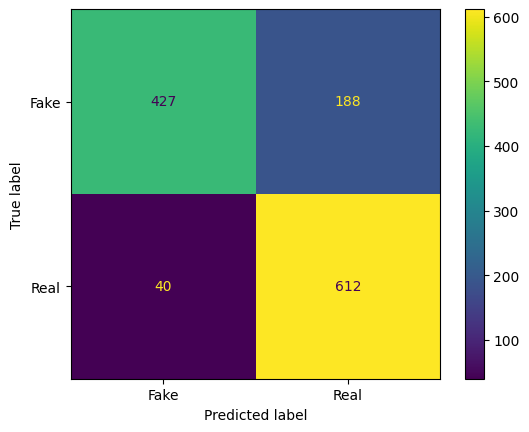

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix(
    y_test, predict_knn), display_labels=['Fake', 'Real'])
cm.plot()  # Call the plot method to display the confusion matrix

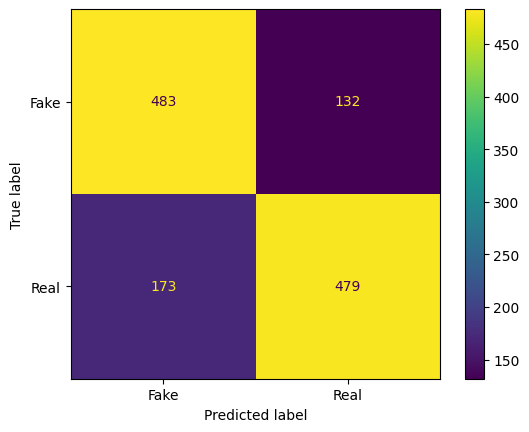

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix(
    y_test, predict_mnb), display_labels=['Fake', 'Real'])
cm.plot()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6335 non-null   object
 1   label   6335 non-null   int64 
 2   vector  6335 non-null   object
dtypes: int64(1), object(2)
memory usage: 148.6+ KB


In [112]:
df.describe()

,label
count,6335.000000
mean,0.500552
std,0.500039
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000
